Found 767 images belonging to 3 classes.
Found 166 images belonging to 3 classes.
Found 164 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 996ms/step - accuracy: 0.6001 - loss: 1.2177 - val_accuracy: 0.7590 - val_loss: 0.5253
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step - accuracy: 0.8410 - loss: 0.4333 - val_accuracy: 0.9036 - val_loss: 0.2581
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.8899 - loss: 0.3041 - val_accuracy: 0.9157 - val_loss: 0.1987
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9167 - loss: 0.2374 - val_accuracy: 0.9819 - val_loss: 0.1573
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 175ms/step - accuracy: 0.9328 - loss: 0.1724 - val_accuracy: 0.9639 - val_loss: 0.1361
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.9698 - loss: 0.1165 - val_accuracy: 0.9880 - val_loss: 0.1249
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9743 - loss: 0.1130 - val_accuracy: 0.9880 - val_loss: 0.1101
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 174ms/step - accuracy: 0.9767 - loss: 0.0891 - val_accuracy: 0.9880 - val

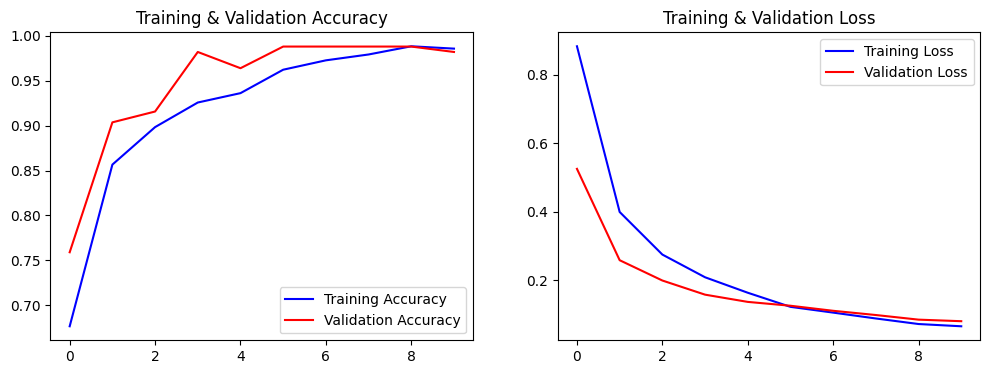

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 876ms/step - accuracy: 0.9881 - loss: 0.1027
Test Accuracy: 99.39%
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step
Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.94      0.97        18
   Malignant       1.00      1.00      1.00        84
      Normal       0.98      1.00      0.99        62

    accuracy                           0.99       164
   macro avg       0.99      0.98      0.99       164
weighted avg       0.99      0.99      0.99       164



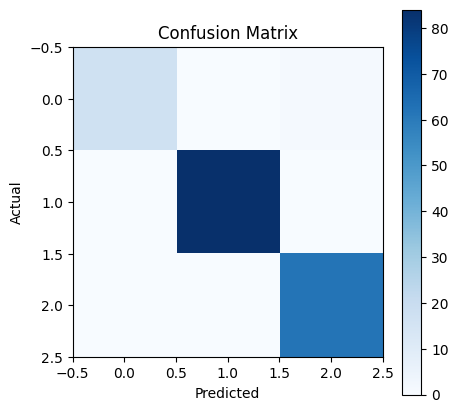

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Define Paths
DATASET_PATH = "/kaggle/input/lung-cancer/Lungnew"
OUTPUT_PATH = "/kaggle/working/"

# ✅ Define batch size and image size
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# ✅ Data Augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# ✅ Load Data
train_generator = train_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "train"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "val"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(DATASET_PATH, "test"),
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False  # Keep order for evaluation
)

# ✅ Load Pretrained VGG16 Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# ✅ Freeze Base Model Layers
for layer in base_model.layers:
    layer.trainable = False

# ✅ Add Custom Layers (Fixed)
x = Flatten()(base_model.output)  
x = Dense(512, activation='relu')(x)  # ✅ Properly connected
x = Dropout(0.5)(x)  # ✅ Properly connected
x = Dense(3, activation='softmax')(x)  # ✅ Properly connected

# ✅ Define Model
model = Model(inputs=base_model.input, outputs=x)

# ✅ Compile Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Train Model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10
)

# ✅ Save Model
model.save(os.path.join(OUTPUT_PATH, "vgg16_lung_cancer.h5"))

# ✅ Plot Accuracy & Loss Graphs
def plot_metrics(history):
    epochs = range(len(history.history['accuracy']))

    # 🔹 Accuracy Plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history.history['accuracy'], 'b', label='Training Accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

    # 🔹 Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history.history['loss'], 'b', label='Training Loss')
    plt.plot(epochs, history.history['val_loss'], 'r', label='Validation Loss')
    plt.title('Training & Validation Loss')
    plt.legend()

    plt.show()

plot_metrics(history)

# ✅ Evaluate on Test Data
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# ✅ Predictions
y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes

# ✅ Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ✅ Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 5))
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


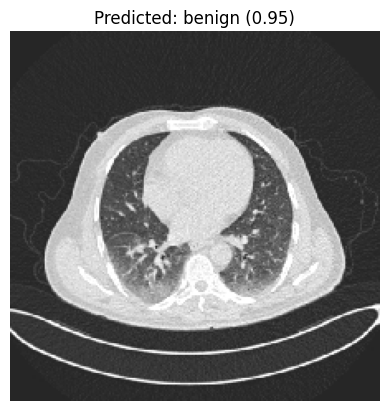

Image Path: /kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (63).jpg
Predicted Class: benign
Confidence Score: 0.95


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# ✅ Load Trained Model
MODEL_PATH = "/kaggle/working/vgg16_lung_cancer.h5"
model = load_model(MODEL_PATH)

# ✅ Class labels
class_labels = ["benign", "malignant", "normal"]  # Modify if needed

# ✅ Function to Test a Specific Image
def test_manual_image(image_path):
    # ✅ Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # ✅ Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence_score = prediction[0][predicted_index]

    # ✅ Display result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
    plt.show()

    print(f"Image Path: {image_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence Score: {confidence_score:.2f}")

# ✅ Provide the path of the image you want to test
image_path = "/kaggle/input/lung-cancer/Lungnew/test/Benign/Bengin case (63).jpg"  # Change this to your image path
test_manual_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


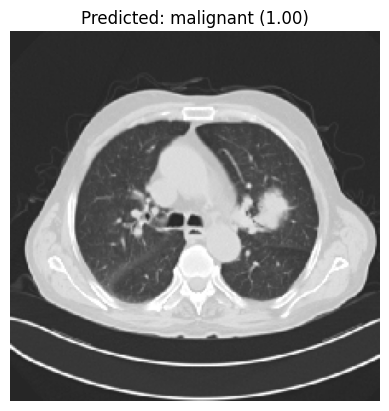

Image Path: /kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (12).jpg
Predicted Class: malignant
Confidence Score: 1.00


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# ✅ Load Trained Model
MODEL_PATH = "/kaggle/working/vgg16_lung_cancer.h5"
model = load_model(MODEL_PATH)

# ✅ Class labels
class_labels = ["benign", "malignant", "normal"]  # Modify if needed

# ✅ Function to Test a Specific Image
def test_manual_image(image_path):
    # ✅ Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # ✅ Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence_score = prediction[0][predicted_index]

    # ✅ Display result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
    plt.show()

    print(f"Image Path: {image_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence Score: {confidence_score:.2f}")

# ✅ Provide the path of the image you want to test
image_path = "/kaggle/input/lung-cancer/Lungnew/test/Malignant/Malignant case (12).jpg"  # Change this to your image path
test_manual_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


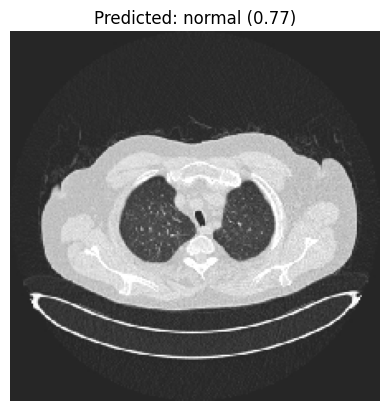

Image Path: /kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (176).jpg
Predicted Class: normal
Confidence Score: 0.77


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# ✅ Load Trained Model
MODEL_PATH = "/kaggle/working/vgg16_lung_cancer.h5"
model = load_model(MODEL_PATH)

# ✅ Class labels
class_labels = ["benign", "malignant", "normal"]  # Modify if needed

# ✅ Function to Test a Specific Image
def test_manual_image(image_path):
    # ✅ Load and preprocess image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # ✅ Predict
    prediction = model.predict(img_array)
    predicted_index = np.argmax(prediction)
    predicted_class = class_labels[predicted_index]
    confidence_score = prediction[0][predicted_index]

    # ✅ Display result
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence_score:.2f})")
    plt.show()

    print(f"Image Path: {image_path}")
    print(f"Predicted Class: {predicted_class}")
    print(f"Confidence Score: {confidence_score:.2f}")

# ✅ Provide the path of the image you want to test
image_path = "/kaggle/input/lung-cancer/Lungnew/test/Normal/Normal case (176).jpg"  # Change this to your image path
test_manual_image(image_path)